In [67]:
import pandas as pd
bank_clients_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lesson14/bank_clients_transactions.csv')

In [68]:
bank_clients_df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [69]:
bank_clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Предобработка данных

In [70]:
# Приведение столбцов в формат camelCase
def to_camel_case(column_name):
    parts = column_name.replace('(', '').replace(')', '').replace(' ', '').split('_')
    return parts[0].lower() + ''.join(word.title() for word in parts[1:])

bank_clients_df.columns = [to_camel_case(col) for col in bank_clients_df.columns]

print(bank_clients_df)

        transactionid customerid customerdob custgender   custlocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         custaccountbalance transactiondate  transactiontime  \
0                  17819.05          2/8/16    

In [71]:
bank_clients_df.head(5)

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamountinr
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [72]:
bank_clients_df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamountinr
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [74]:
import pandas as pd
import re

# Предполагается, что у вас уже загружен датафрейм bank_clients_df

def convert_date(date_str):
    """Преобразует дату в единый формат YYYY-MM-DD."""
    # Check if the input is a string or bytes-like object
    if isinstance(date_str, (str, bytes)):  # Check if date_str is string or bytes-like
        match = re.match(r'(\d{1,2})/(\d{1,2})/(\d{2,4})', date_str)  #регулярка для обоих форматов
        if match:
            day, month, year = match.groups()
            year = int(year)
            if year < 100:  # Если год двухзначный, добавляем 1900 или 2000
              year = year + 1900 if year <= 60 else year + 1900  # Простое предположение -  с 60 года -  20 век
            return pd.to_datetime(f"{year}-{month}-{day}", format='%Y-%m-%d')
    # If not a string or bytes-like object, return NaT
    return pd.NaT  # Возвращаем NaT (Not a Time) для некорректных дат


bank_clients_df['customerdob'] = bank_clients_df['customerdob'].apply(convert_date)
bank_clients_df['transactiondate'] = pd.to_datetime(bank_clients_df['transactiondate']) #Этот остаётся без изменений

#Проверка на наличие ошибок в преобразовании
print(bank_clients_df.isnull().sum())

# Удаление строк с ошибочными датами (опционально)
bank_clients_df.dropna(subset=['customerdob'], inplace=True)


# Проверка типов данных после преобразования (опционально)
print(bank_clients_df.dtypes)

<ipython-input-74-c7a176f01e83>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_clients_df['transactiondate'] = pd.to_datetime(bank_clients_df['transactiondate']) #Этот остаётся без изменений


transactionid              0
customerid                 0
customerdob             3397
custgender              1100
custlocation             151
custaccountbalance      2369
transactiondate            0
transactiontime            0
transactionamountinr       0
dtype: int64
transactionid                   object
customerid                      object
customerdob             datetime64[ns]
custgender                      object
custlocation                    object
custaccountbalance             float64
transactiondate         datetime64[ns]
transactiontime                  int64
transactionamountinr           float64
dtype: object


In [75]:
bank_clients_df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamountinr
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [76]:
# Удаление дубликатов
bank_clients_df = bank_clients_df.drop_duplicates()

# Удаление строк с пропусками
bank_clients_df = bank_clients_df.dropna()

# Проверим изменения
print(f"Размер датафрейма после обработки: {bank_clients_df.shape}")

Размер датафрейма после обработки: (1041614, 9)


Исследовательский анализ данных.

In [77]:
# Определяем общее количество клиентов
total_clients = bank_clients_df['customerid'].count()

# Определяем количество уникальных клиентов
unique_clients = bank_clients_df['customerid'].nunique()

# Выводим результаты
print(f'Общее количество клиентов: {total_clients}')
print(f'Количество уникальных клиентов: {unique_clients}')

Общее количество клиентов: 1041614
Количество уникальных клиентов: 879358


In [78]:
# Общее количество транзакций
total_transactions = bank_clients_df.shape[0]

print(f"Общее количество транзакций: {total_transactions}")

Общее количество транзакций: 1041614


In [79]:
# Группировка по клиентам и подсчёт транзакций
transactions_per_client = bank_clients_df.groupby('customerid').size()

# Среднее количество транзакций на клиента
avg_transactions_per_client = transactions_per_client.mean()

print(f"Среднее количество транзакций на клиента (группировка): {avg_transactions_per_client:.2f}")

Среднее количество транзакций на клиента (группировка): 1.18


In [80]:
# Общее количество транзакций
total_transactions = bank_clients_df.shape[0]

# Количество уникальных клиентов
unique_clients = bank_clients_df['customerid'].nunique()

# Среднее количество транзакций на клиента
avg_transactions_per_client = total_transactions / unique_clients

print(f"Среднее количество транзакций на клиента: {avg_transactions_per_client:.2f}")

Среднее количество транзакций на клиента: 1.18


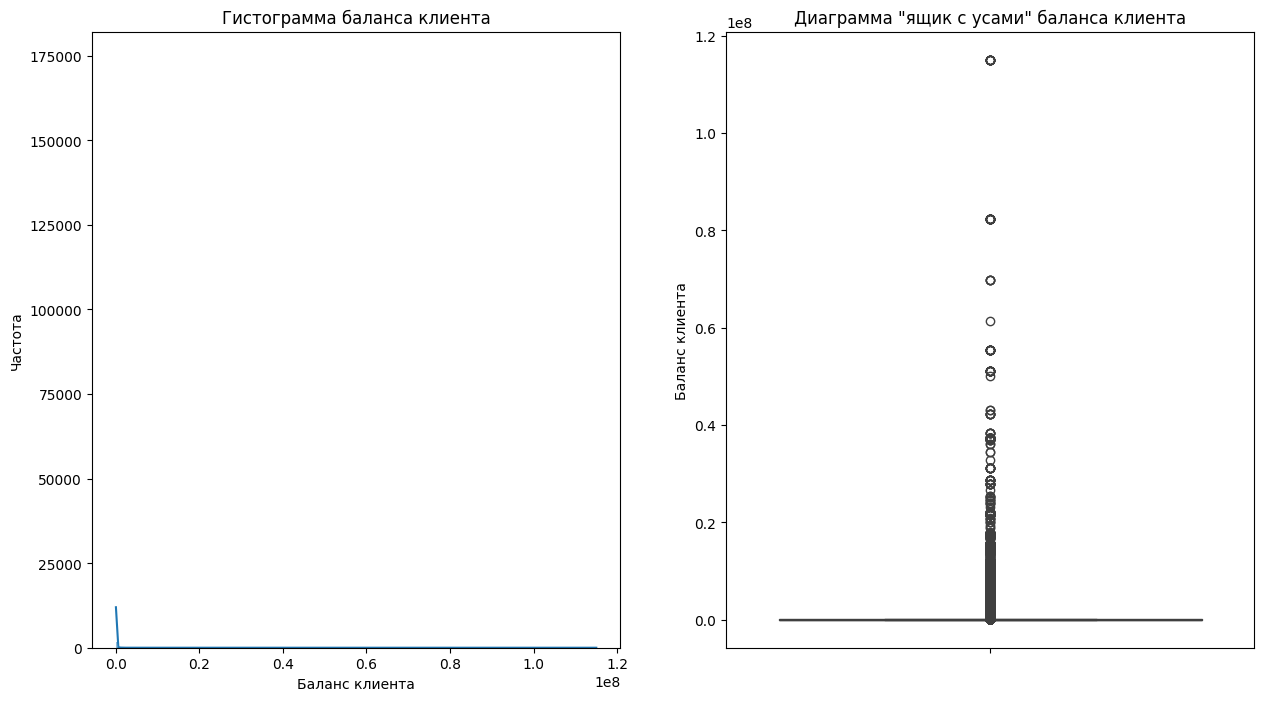

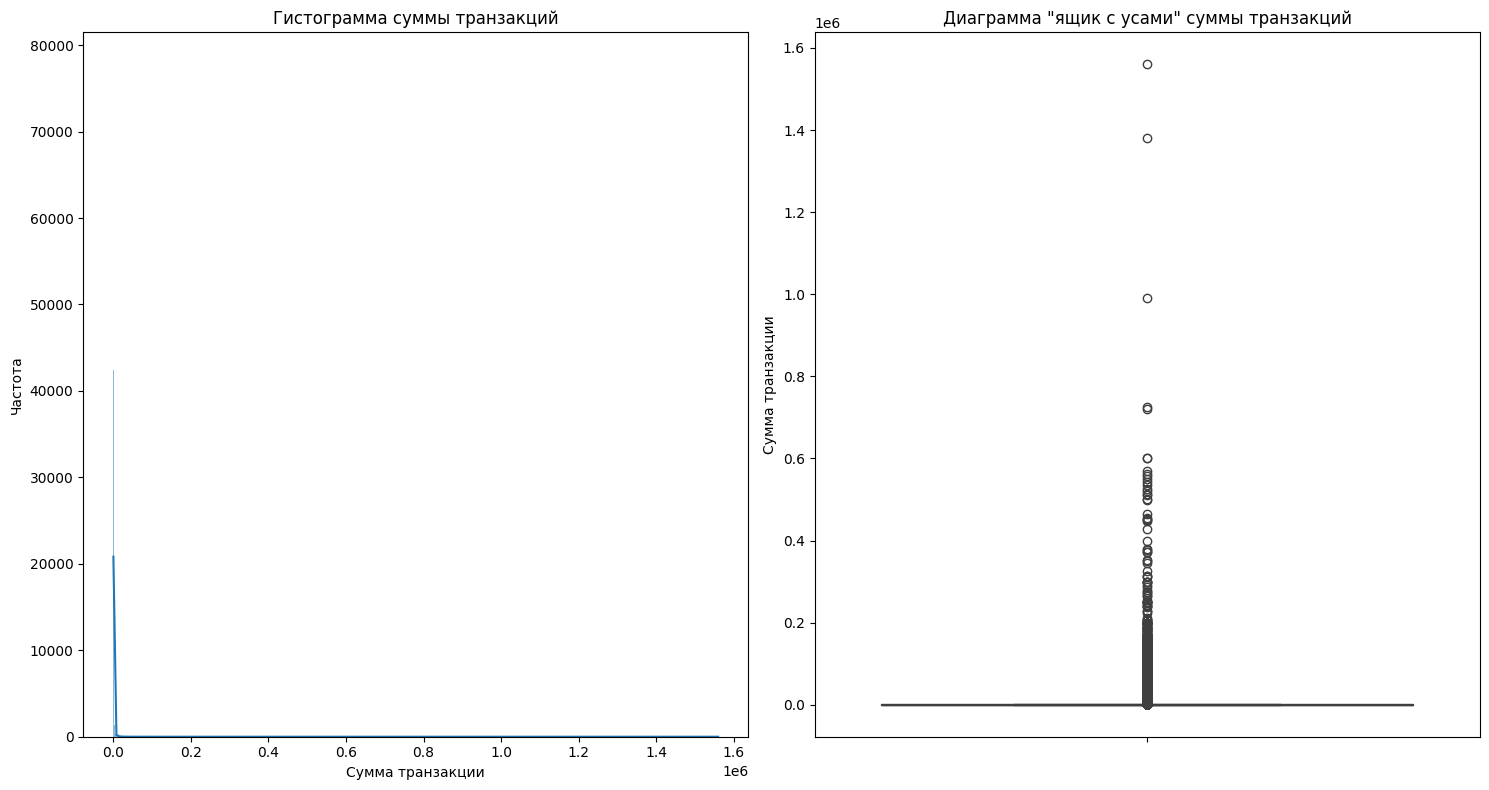

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Предполагается, что у вас уже загружен датафрейм bank_clients_df

# Определение оптимального количества корзин для гистограмм (опытным путем)
def optimal_bins(data):
    # Используем правило Sturges
    sturges_bins = int(np.ceil(np.log2(len(data)) + 1))
    # Используем правило Freedman-Diaconis
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    binwidth = 2 * iqr / (len(data)**(1/3))
    freedman_bins = int(np.ceil((data.max() - data.min()) / binwidth))
    # Возвращаем среднее значение от обоих правил
    return int((sturges_bins + freedman_bins) / 2)

# Построение гистограмм и диаграмм "ящик с усами"
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
num_bins = optimal_bins(bank_clients_df['custaccountbalance'])
sns.histplot(bank_clients_df['custaccountbalance'], bins=num_bins, kde=True)
plt.title('Гистограмма баланса клиента')
plt.xlabel('Баланс клиента')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=bank_clients_df['custaccountbalance'])
plt.title('Диаграмма "ящик с усами" баланса клиента')
plt.ylabel('Баланс клиента')


plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
num_bins = optimal_bins(bank_clients_df['transactionamountinr'])
sns.histplot(bank_clients_df['transactionamountinr'], bins=num_bins, kde=True)
plt.title('Гистограмма суммы транзакций')
plt.xlabel('Сумма транзакции')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=bank_clients_df['transactionamountinr'])
plt.title('Диаграмма "ящик с усами" суммы транзакций')
plt.ylabel('Сумма транзакции')

plt.tight_layout()
plt.show()

Вывод:

1. Чем меньше баланс клиента, тем он чаще обращается в банк за услугами

2. Чем меньше сумма транзакции, тем большее их количество обрабатывается банком

In [86]:
bank_clients_df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamountinr
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


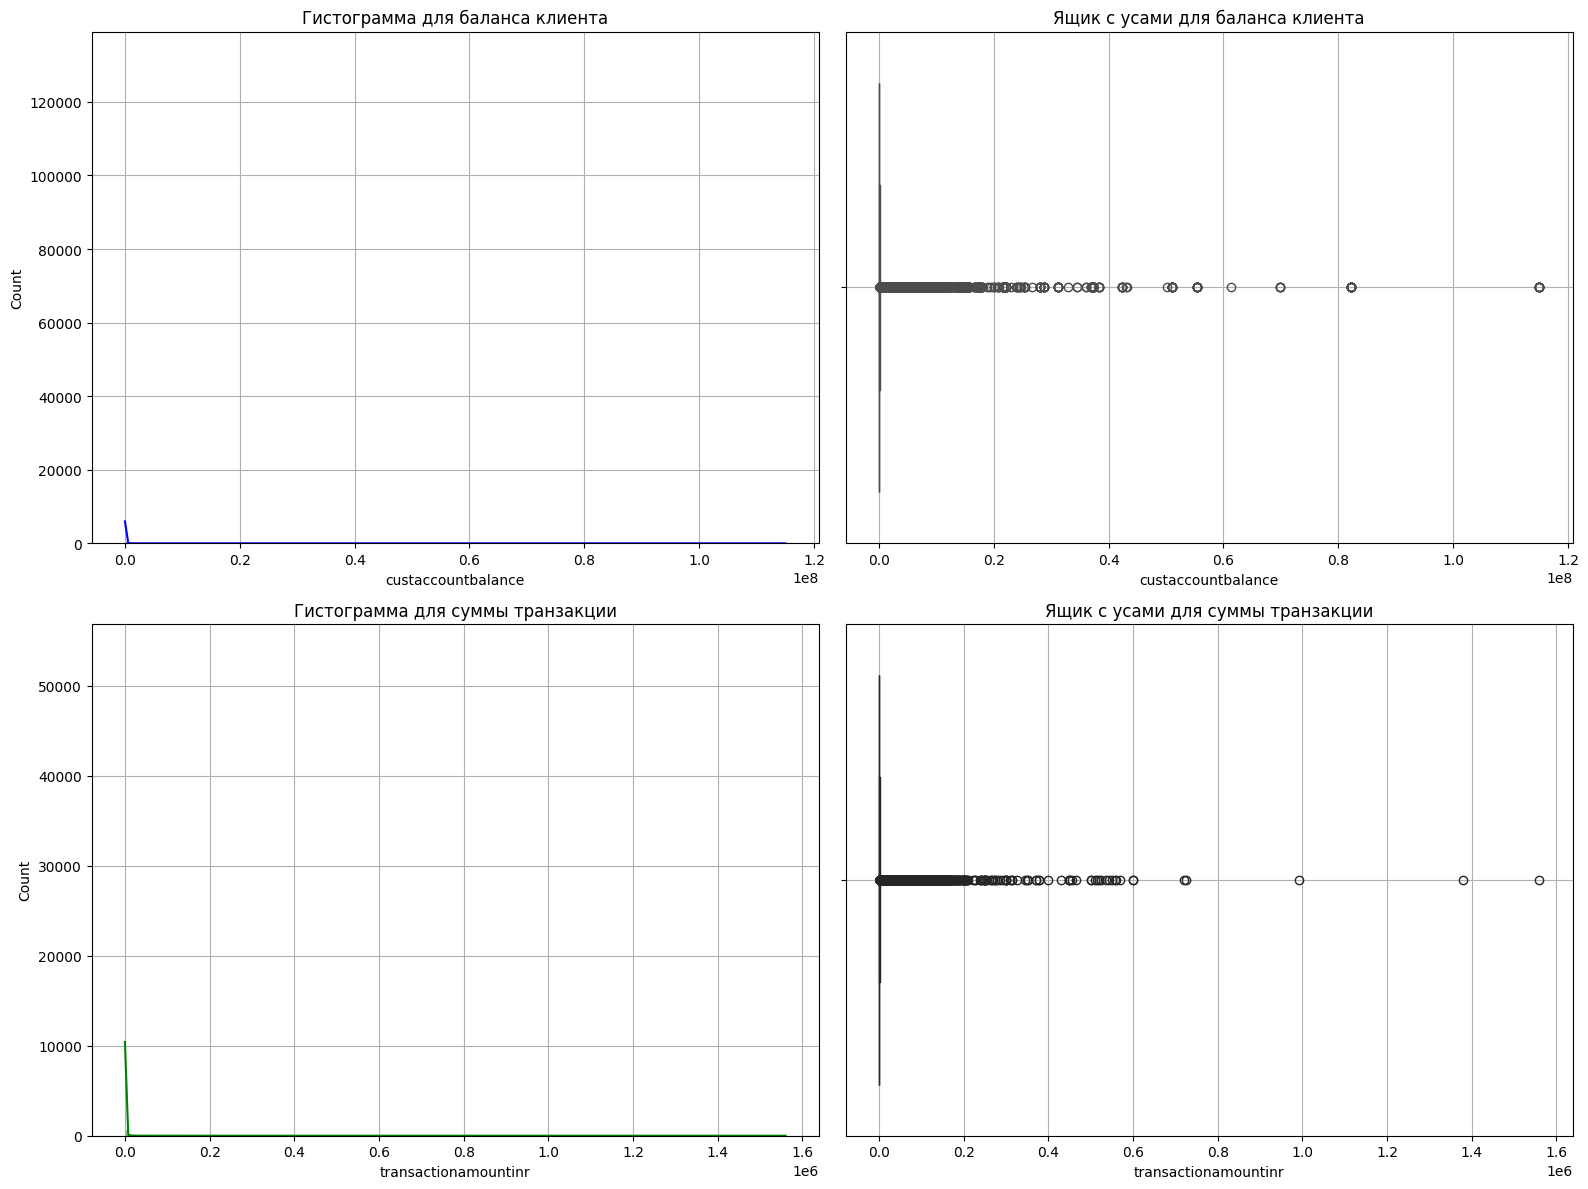

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Проверяем названия столбцов (если они в разном регистре)
bank_clients_df.columns = bank_clients_df.columns.str.lower()

# Преобразование типов для нужных полей
bank_clients_df['custaccountbalance'] = pd.to_numeric(bank_clients_df['custaccountbalance'], errors='coerce')
bank_clients_df['transactionamountinr'] = pd.to_numeric(bank_clients_df['transactionamountinr'], errors='coerce')

# Убираем выбросы и NaN для корректности анализа
filtered_df = bank_clients_df.dropna(subset=['custaccountbalance', 'transactionamountinr'])

# Оптимальное количество корзин для гистограммы определяется с помощью формулы Фридмана-Дьякониса
def optimal_bins(data):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    bin_width = 2 * iqr * (len(data) ** (-1/3))
    bins = int((data.max() - data.min()) / bin_width) if bin_width > 0 else 10
    return max(bins, 10)  # Минимум 10 корзин

# Построение графиков для 'custaccountbalance'
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(filtered_df['custaccountbalance'], bins=optimal_bins(filtered_df['custaccountbalance']), kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Гистограмма для баланса клиента')
sns.boxplot(x=filtered_df['custaccountbalance'], ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Ящик с усами для баланса клиента')

# Построение графиков для 'transactionamountinr'
sns.histplot(filtered_df['transactionamountinr'], bins=optimal_bins(filtered_df['transactionamountinr']), kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Гистограмма для суммы транзакции')
sns.boxplot(x=filtered_df['transactionamountinr'], ax=axes[1, 1], color='green')
axes[1, 1].set_title('Ящик с усами для суммы транзакции')

# Оформление графиков
for ax in axes.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

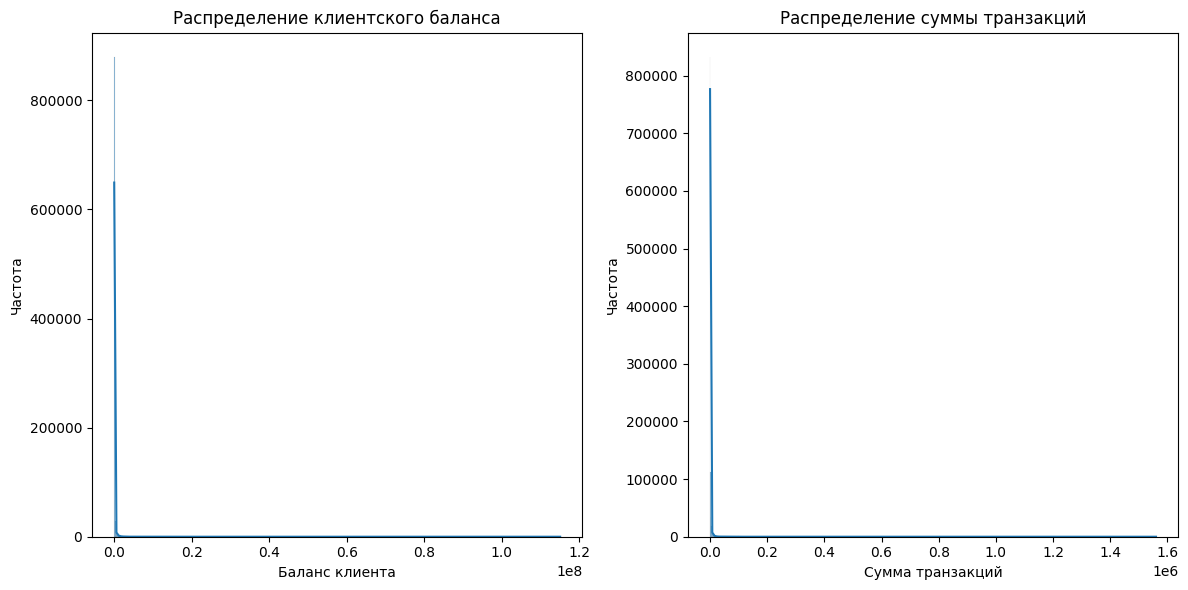

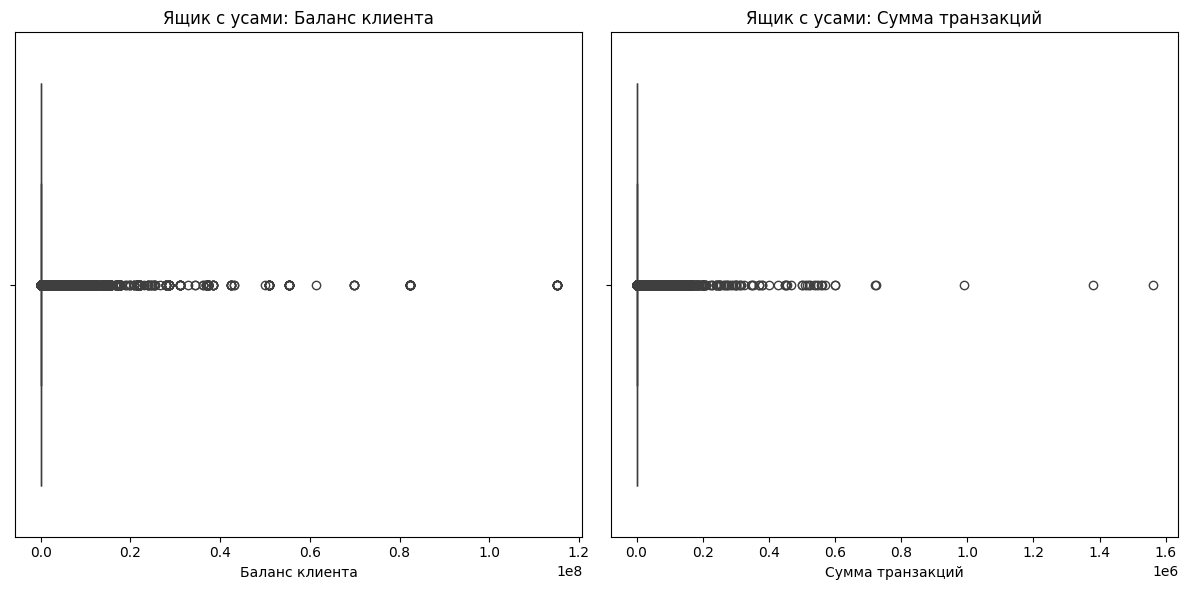

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Определение количества корзин для гистограммы
def optimal_bins(data):
    return int(np.sqrt(len(data)))

# Распределение клиентского баланса
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(bank_clients_df['custaccountbalance'], bins=optimal_bins(bank_clients_df['custaccountbalance']), kde=True)
plt.title('Распределение клиентского баланса')
plt.xlabel('Баланс клиента')
plt.ylabel('Частота')

# Распределение суммы транзакций
plt.subplot(1, 2, 2)
sns.histplot(bank_clients_df['transactionamountinr'], bins=optimal_bins(bank_clients_df['transactionamountinr']), kde=True)
plt.title('Распределение суммы транзакций')
plt.xlabel('Сумма транзакций')
plt.ylabel('Частота')
plt.tight_layout()

# Ящик с усами для клиентского баланса
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=bank_clients_df['custaccountbalance'])
plt.title('Ящик с усами: Баланс клиента')
plt.xlabel('Баланс клиента')

# Ящик с усами для суммы транзакций
plt.subplot(1, 2, 2)
sns.boxplot(x=bank_clients_df['transactionamountinr'])
plt.title('Ящик с усами: Сумма транзакций')
plt.xlabel('Сумма транзакций')
plt.tight_layout()

plt.show()

In [92]:
bank_clients_df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamountinr,age_at_transaction,current_age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22,30
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,58,67
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,19,27
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,42,51
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,27,36
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26,34
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24,32
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27,35
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38,46


In [95]:
import pandas as pd
from datetime import datetime

# Приведение типов данных к datetime
bank_clients_df['customerdob'] = pd.to_datetime(bank_clients_df['customerdob'])
bank_clients_df['transactiondate'] = pd.to_datetime(bank_clients_df['transactiondate'])

# Функция для расчета возраста
def calculate_age(dob, on_date):
    return on_date.year - dob.year - ((on_date.month, on_date.day) < (dob.month, dob.day))

# Текущая дата
current_date = datetime.now()

# Добавление столбцов с возрастом
bank_clients_df['age_at_transaction'] = bank_clients_df.apply(lambda row: calculate_age(row['customerdob'], row['transactiondate']), axis=1)
bank_clients_df['current_age'] = bank_clients_df['customerdob'].apply(lambda dob: calculate_age(dob, current_date))

# Вывод результата
print(bank_clients_df[['customerid', 'customerdob', 'transactiondate', 'age_at_transaction', 'current_age']])


        customerid customerdob transactiondate  age_at_transaction  \
0         C5841053  1994-01-10      2016-02-08                  22   
1         C2142763  1957-04-04      2016-02-08                  58   
2         C4417068  1996-11-26      2016-02-08                  19   
3         C5342380  1973-09-14      2016-02-08                  42   
4         C9031234  1988-03-24      2016-02-08                  27   
...            ...         ...             ...                 ...   
1048562   C8020229  1990-04-08      2016-09-18                  26   
1048563   C6459278  1992-02-20      2016-09-18                  24   
1048564   C6412354  1989-05-18      2016-09-18                  27   
1048565   C6420483  1978-08-30      2016-09-18                  38   
1048566   C8337524  1984-03-05      2016-09-18                  32   

         current_age  
0                 30  
1                 67  
2                 27  
3                 51  
4                 36  
...              ... 

Распределение клиентов по возрастным группам:
age_group
18-17         0
18-24         0
25-34    277053
35-44    494117
45-54    146661
55-64     43050
65+       23506
Name: count, dtype: int64


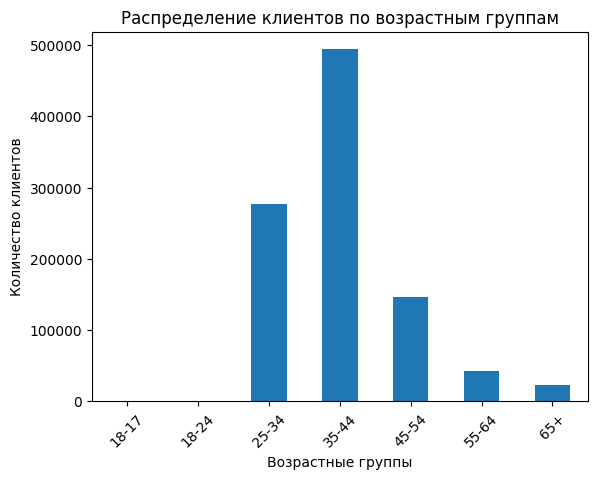

In [99]:
import pandas as pd
from datetime import datetime


# Преобразуем столбец с датой рождения в формат datetime
bank_clients_df['customerdob'] = pd.to_datetime(bank_clients_df['customerdob'])

# Вычислим текущую дату
current_date = datetime.now()

# Рассчитаем возраст клиентов, используя apply для поэлементного сравнения
bank_clients_df['age'] = bank_clients_df['customerdob'].apply(lambda dob: current_date.year - dob.year - ((current_date.month, current_date.day) < (dob.month, dob.day)))


# Теперь можно проанализировать возраст клиентов
# Например, можно создать сводную таблицу по возрастным группам
age_bins = [0, 18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bank_clients_df['age_group'] = pd.cut(bank_clients_df['age'], bins=age_bins, labels=age_labels, right=False)

# Подсчитаем количество клиентов в каждой возрастной группе
age_distribution = bank_clients_df['age_group'].value_counts().sort_index()

# Выводим результаты
print("Распределение клиентов по возрастным группам:")
print(age_distribution)

# Если нужно, также можно визуализировать данные
import matplotlib.pyplot as plt

age_distribution.plot(kind='bar')
plt.title('Распределение клиентов по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()

Вывод:

Основные клиенты банка находятся в возрасте от 25 до 50 лет (наибольшее количество в возрастной категории 35-44 лет)

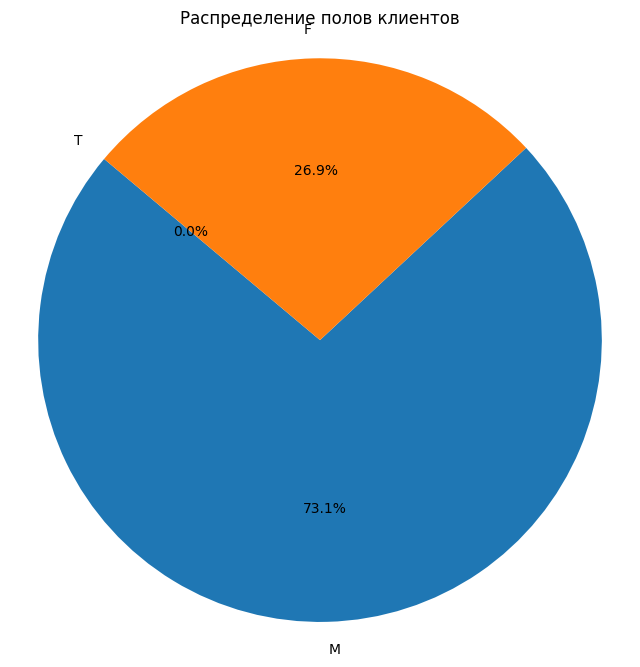

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже загружен датафрейм bank_clients_df

# Подсчет количества мужчин и женщин
gender_counts = bank_clients_df['custgender'].value_counts(dropna=False)

# Обработка пропущенных значений (опционально)
if gender_counts.index.size < 2:
    print("Предупреждение: в данных мало значений пола или отсутствуют значения.  Проверьте данные.")
else:
    # Создание круговой диаграммы
    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Распределение полов клиентов')
    plt.axis('equal')  # Окружность диаграммы
    plt.show()

Вывод:

Судя из графика клиентов мужчин 73.1 %, а женщин 26.9 %

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже загружен датафрейм bank_clients_df

# Подсчет уникальных клиентов в каждом городе
location_counts = bank_clients_df.groupby('custlocation')['customerid'].nunique().sort_values(ascending=False)
print(location_counts)

"""# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))  # Увеличиваем размер диаграммы для лучшей читаемости
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Местоположение')
plt.ylabel('Количество уникальных клиентов')
plt.title('Количество уникальных клиентов по местоположению')
plt.xticks(rotation=90, ha='right') # Поворачиваем подписи на оси x для удобства чтения
plt.tight_layout() # Улучшаем компоновку для предотвращения перекрытия элементов
plt.show()
"""

custlocation
MUMBAI                          100198
NEW DELHI                        82811
BANGALORE                        80128
GURGAON                          72637
DELHI                            69611
                                 ...  
BARODA-VADODARA                      1
BARIGADE ROAD AREA BANGALORE         1
SANTACRUZ (EAST) MUMBAI              1
LAYOUT BOGADHI MYSORE                1
ZUNHEBOTO                            1
Name: customerid, Length: 9275, dtype: int64


"# Построение столбчатой диаграммы\nplt.figure(figsize=(12, 6))  # Увеличиваем размер диаграммы для лучшей читаемости\nplt.bar(location_counts.index, location_counts.values)\nplt.xlabel('Местоположение')\nplt.ylabel('Количество уникальных клиентов')\nplt.title('Количество уникальных клиентов по местоположению')\nplt.xticks(rotation=90, ha='right') # Поворачиваем подписи на оси x для удобства чтения\nplt.tight_layout() # Улучшаем компоновку для предотвращения перекрытия элементов\nplt.show()\n"

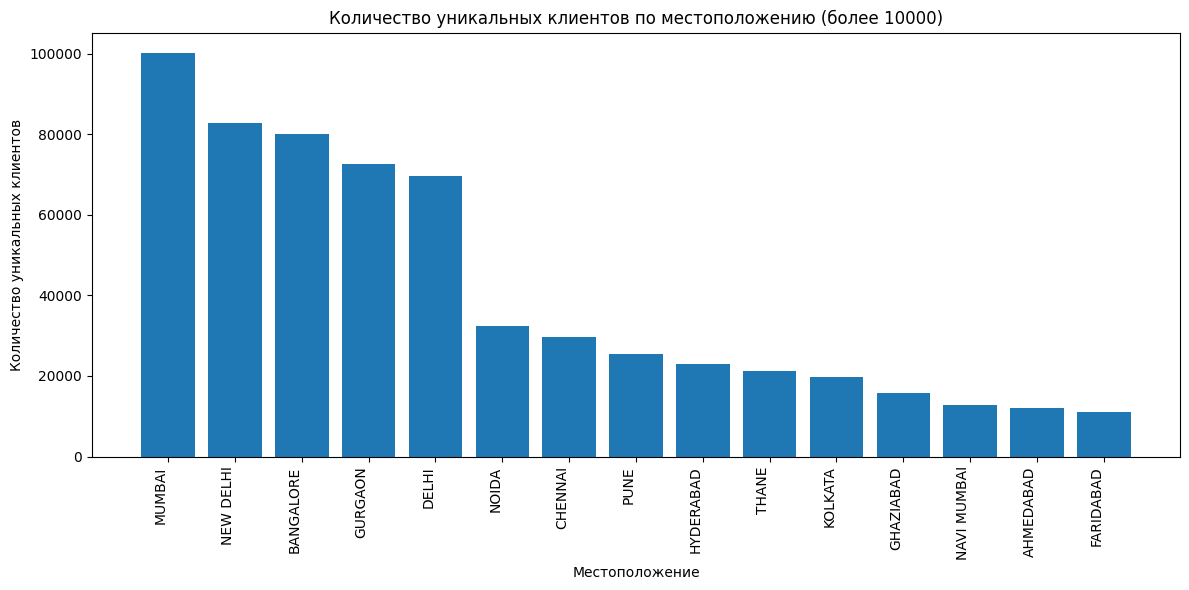

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что у вас уже загружен датафрейм bank_clients_df

# Подсчет уникальных клиентов в каждом городе
location_counts = bank_clients_df.groupby('custlocation')['customerid'].nunique()

# Фильтрация городов с более чем 10000 уникальными клиентами
location_counts_filtered = location_counts[location_counts > 10000]

# Сортировка данных (по убыванию по умолчанию)
location_counts_filtered = location_counts_filtered.sort_values(ascending=False)


# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.bar(location_counts_filtered.index, location_counts_filtered.values)
plt.xlabel('Местоположение')
plt.ylabel('Количество уникальных клиентов')
plt.title('Количество уникальных клиентов по местоположению (более 10000)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Вывод:

Наибольшее количество клиентов из пяти индийских городов Mumbai, New Delhi, Bangalore, Gurgaon, Delhi.

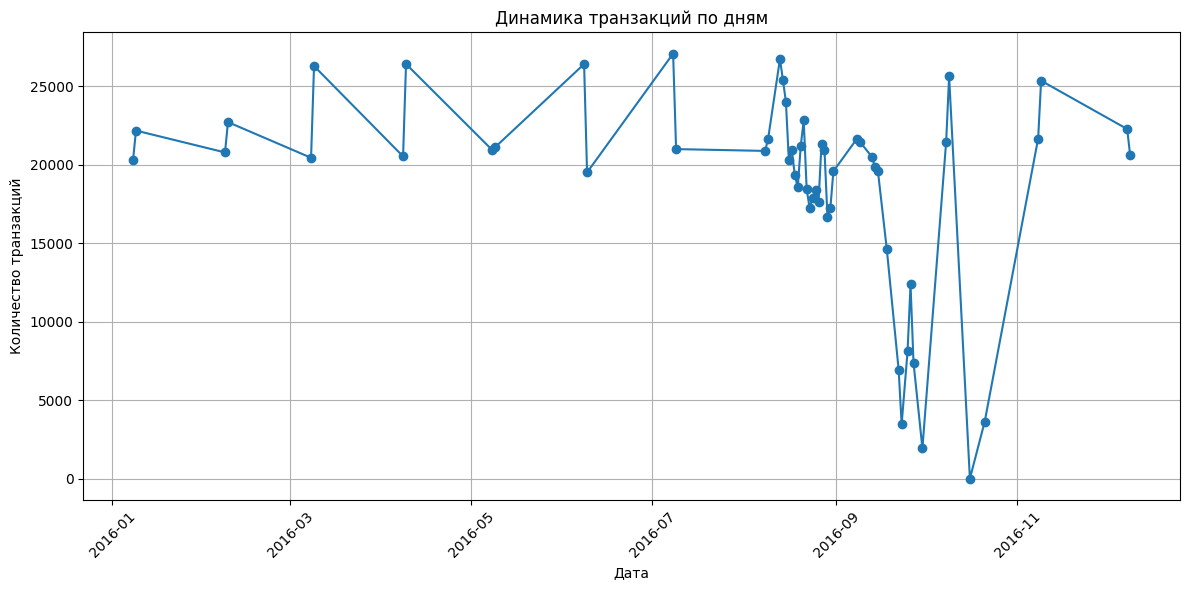

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что ваш датафрейм уже загружен и называется bank_clients_df

# Преобразуем столбец 'transactiondate' в формат datetime
bank_clients_df['transactiondate'] = pd.to_datetime(bank_clients_df['transactiondate'])

# Группировка по дням, суммируя количество транзакций
daily_transactions = bank_clients_df.groupby('transactiondate').size()

# Если график будет слишком мелким, можно сгруппировать по месяцам
# monthly_transactions = bank_clients_df.resample('M', on='transactiondate').size()

# Построение линейного графика
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values, marker='o')
plt.title('Динамика транзакций по дням')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Если вы хотите сгруппировать по месяцам, раскомментируйте следующий код
# plt.plot(monthly_transactions.index, monthly_transactions.values, marker='o')

plt.show()

<ipython-input-111-1c737e3dcabd>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = bank_clients_df.resample('M', on='transactiondate').size() #This line was previously commented out, causing the error


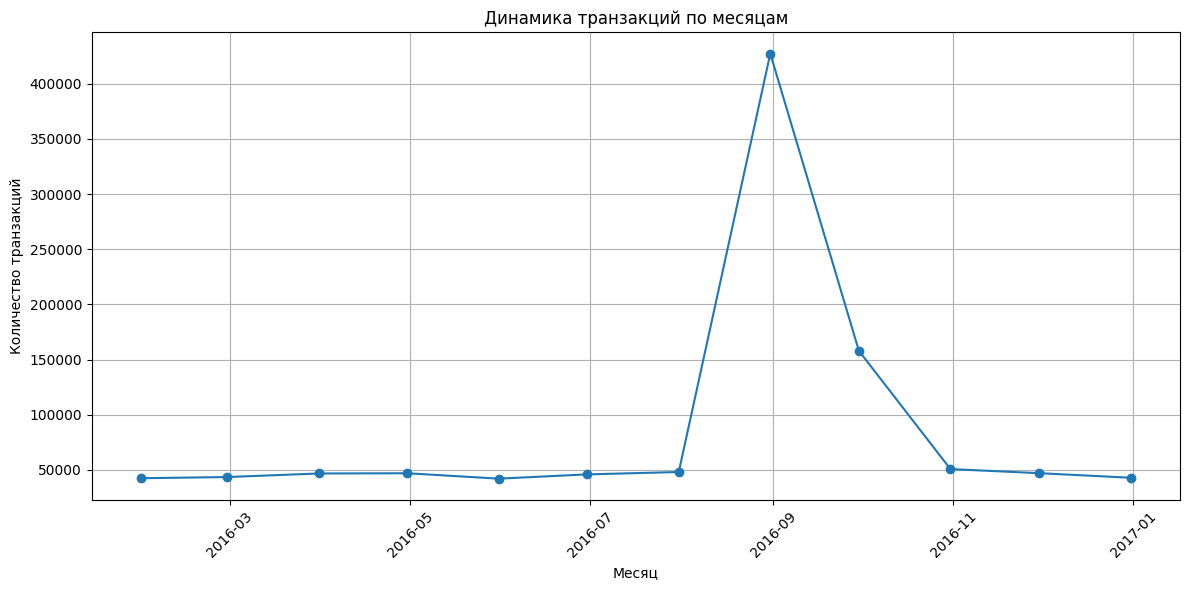

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что ваш датафрейм уже загружен и называется bank_clients_df

# Преобразуем столбец 'transactiondate' в формат datetime
bank_clients_df['transactiondate'] = pd.to_datetime(bank_clients_df['transactiondate'])

# Группировка по дням, суммируя количество транзакций
daily_transactions = bank_clients_df.groupby('transactiondate').size()

# Если график будет слишком мелким, можно сгруппировать по месяцам
# Раскомментируем следующую строку, чтобы сгруппировать по месяцам:
monthly_transactions = bank_clients_df.resample('M', on='transactiondate').size() #This line was previously commented out, causing the error

# Построение линейного графика
plt.figure(figsize=(12, 6))
# plt.plot(daily_transactions.index, daily_transactions.values, marker='o')
# Если вы хотите сгруппировать по месяцам, раскомментируйте следующий код
plt.plot(monthly_transactions.index, monthly_transactions.values, marker='o')
plt.title('Динамика транзакций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()

Вывод:

Из графика видно, что наибольшее количество транзакций было зафиксировано в период с августа по октябрь (пик приходится на сентябрь месяц)

<ipython-input-113-570ebfb10818>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = bank_clients_df.resample('M', on='transactiondate')['transactionamountinr'].sum()


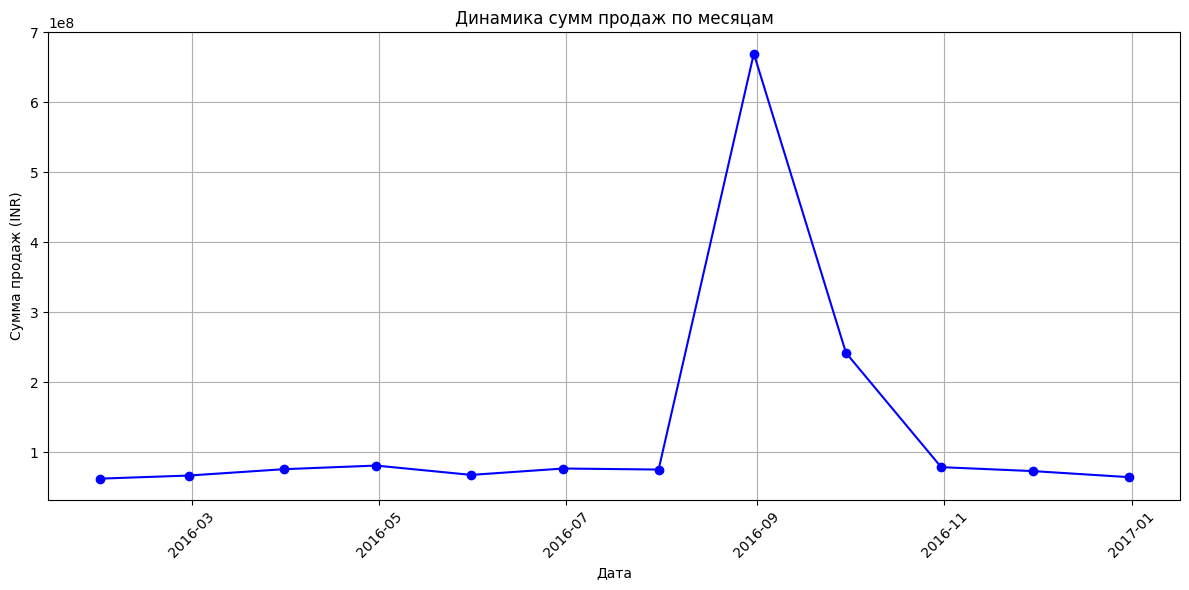

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что ваш датафрейм уже загружен и называется bank_clients_df

# Преобразуем столбец 'transactiondate' в формат datetime
bank_clients_df['transactiondate'] = pd.to_datetime(bank_clients_df['transactiondate'])

# Суммируем продажи по месяцам
monthly_sales = bank_clients_df.resample('M', on='transactiondate')['transactionamountinr'].sum()

# Построение линейного графика
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
plt.title('Динамика сумм продаж по месяцам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж (INR)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()

Вывод:

Общий вид графика достаточно ровный, за исключение пика суммы продаж, которые приходятся на август-октябрь месяц. Возможно это связано с сезоном (конец летних отпусков, каникул и т.п.)

In [115]:
import pandas as pd
from datetime import datetime

# Преобразуем дату рождения в datetime и считаем возраст
bank_clients_df['customerdob'] = pd.to_datetime(bank_clients_df['customerdob'])
current_date = datetime.now()
bank_clients_df['age'] = (current_date - bank_clients_df['customerdob']).dt.days // 365

# Определяем возрастные группы
bins = range(0, 101, 15)  # Например, от 0 до 100 с шагом 15
labels = [f"{i}-{i + 14}" for i in bins[:-1]]  # Формируем метки для групп
bank_clients_df['age_group'] = pd.cut(bank_clients_df['age'], bins=bins, labels=labels, right=False)

# Определяем самую платежеспособную группу
# Можно использовать средний баланс или среднюю сумму транзакций
average_balance = bank_clients_df.groupby('age_group')['custaccountbalance'].mean().reset_index()
average_transaction_amount = bank_clients_df.groupby('age_group')['transactionamountinr'].mean().reset_index()

# Находим возрастную группу с максимальным средним балансом
max_balance_group = average_balance.loc[average_balance['custaccountbalance'].idxmax()]

# Находим возрастную группу с максимальной средней суммой транзакций
max_transaction_group = average_transaction_amount.loc[average_transaction_amount['transactionamountinr'].idxmax()]

print("Возрастная группа с максимальным средним балансом:")
print(max_balance_group)

print("\nВозрастная группа с максимальной средней суммой транзакций:")
print(max_transaction_group)

Возрастная группа с максимальным средним балансом:
age_group                     60-74
custaccountbalance    445634.075042
Name: 4, dtype: object

Возрастная группа с максимальной средней суммой транзакций:
age_group                     75-89
transactionamountinr    3554.057321
Name: 5, dtype: object


<ipython-input-115-aec5dd34f493>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_balance = bank_clients_df.groupby('age_group')['custaccountbalance'].mean().reset_index()
<ipython-input-115-aec5dd34f493>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_transaction_amount = bank_clients_df.groupby('age_group')['transactionamountinr'].mean().reset_index()


<ipython-input-116-99cfcc475997>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_balance = bank_clients_df.groupby('age_group')['custaccountbalance'].mean().reset_index()
<ipython-input-116-99cfcc475997>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_transaction_amount = bank_clients_df.groupby('age_group')['transactionamountinr'].mean().reset_index()
<ipython-input-116-99cfcc475997>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=av

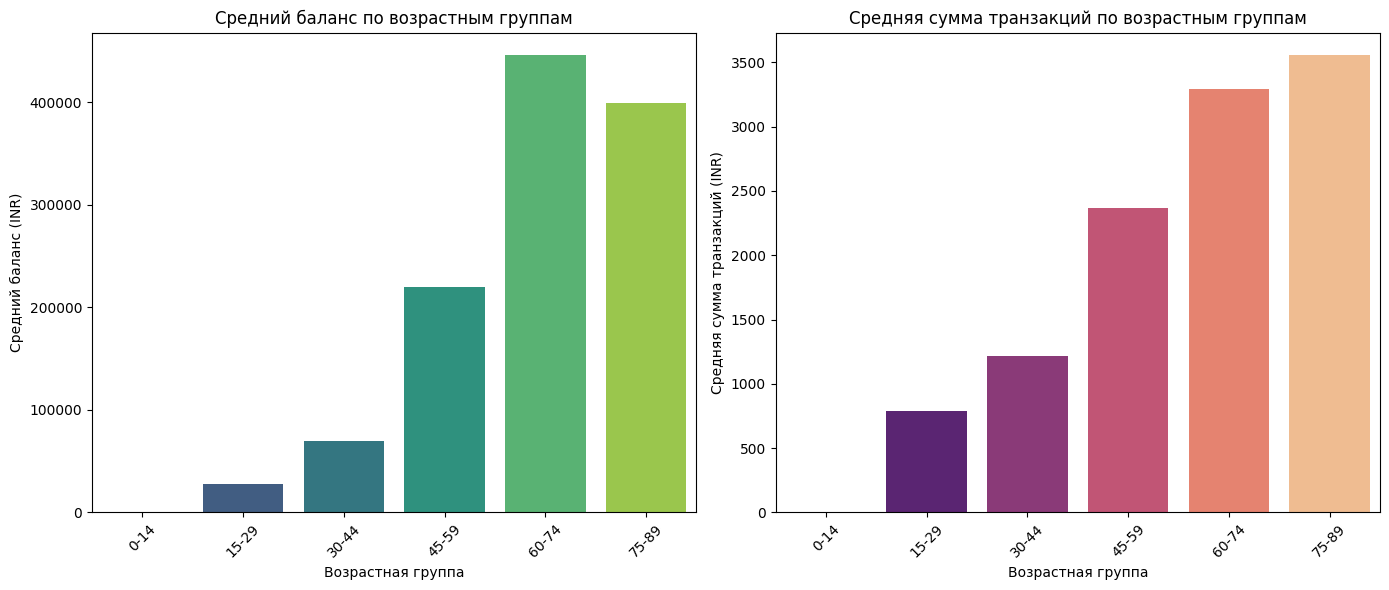

In [116]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем дату рождения в datetime и считаем возраст
bank_clients_df['customerdob'] = pd.to_datetime(bank_clients_df['customerdob'])
current_date = datetime.now()
bank_clients_df['age'] = (current_date - bank_clients_df['customerdob']).dt.days // 365

# Определяем возрастные группы
bins = range(0, 101, 15)  # Например, от 0 до 100 с шагом 15
labels = [f"{i}-{i + 14}" for i in bins[:-1]]  # Формируем метки для групп
bank_clients_df['age_group'] = pd.cut(bank_clients_df['age'], bins=bins, labels=labels, right=False)

# Определяем средний баланс и среднюю сумму транзакций
average_balance = bank_clients_df.groupby('age_group')['custaccountbalance'].mean().reset_index()
average_transaction_amount = bank_clients_df.groupby('age_group')['transactionamountinr'].mean().reset_index()

# Визуализация
plt.figure(figsize=(14, 6))

# Подграфик 1: Средний баланс по возрастным группам
plt.subplot(1, 2, 1)
sns.barplot(data=average_balance, x='age_group', y='custaccountbalance', palette='viridis')
plt.title('Средний баланс по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средний баланс (INR)')
plt.xticks(rotation=45)

# Подграфик 2: Средняя сумма транзакций по возрастным группам
plt.subplot(1, 2, 2)
sns.barplot(data=average_transaction_amount, x='age_group', y='transactionamountinr', palette='magma')
plt.title('Средняя сумма транзакций по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя сумма транзакций (INR)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Вывод:

1. Возрастная группа с максимально средним балансом 60-74 года (среднее значение 445634.07)

2. Возрастная группа с максимально средней суммой транзакций 75-89 лет (среднее значение 3554.06)

<ipython-input-120-11c07d7654a6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TransactionCount', y='Location', data=transactions_by_location, palette='viridis')


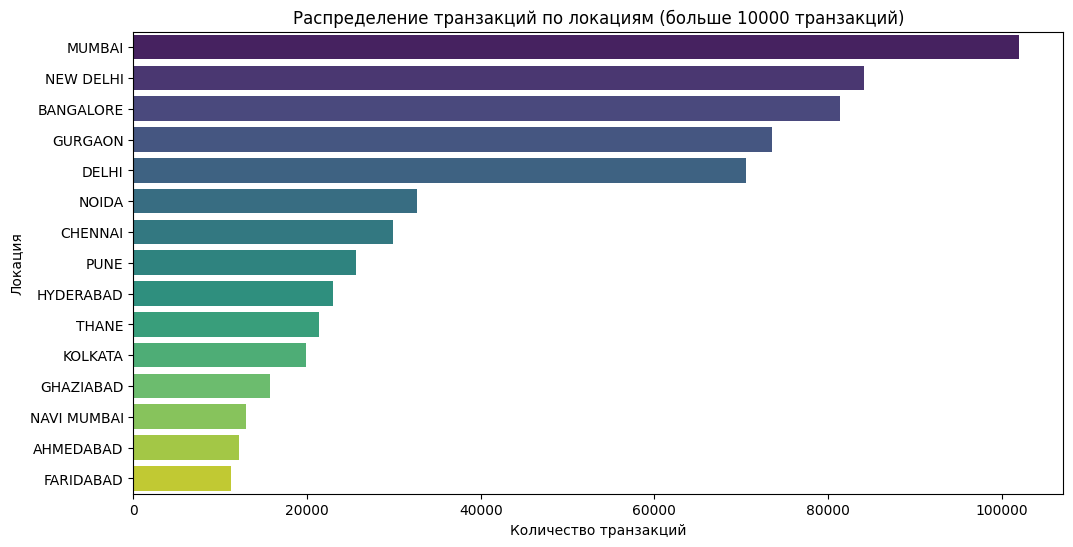

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что ваш DataFrame уже загружен в переменную bank_clients_df

# Группируем данные по локациям и считаем количество транзакций в каждой локации
transactions_by_location = bank_clients_df.groupby('custlocation')['transactionid'].count().reset_index()

# Переименовываем столбцы для удобства
transactions_by_location.columns = ['Location', 'TransactionCount']

# Фильтруем локации с количеством транзакций больше 100
transactions_by_location = transactions_by_location[transactions_by_location['TransactionCount'] > 10000]

# Сортируем по количеству транзакций
transactions_by_location = transactions_by_location.sort_values(by='TransactionCount', ascending=False)

# Визуализируем данные
plt.figure(figsize=(12, 6))
sns.barplot(x='TransactionCount', y='Location', data=transactions_by_location, palette='viridis')
plt.title('Распределение транзакций по локациям (больше 10000 транзакций)')
plt.xlabel('Количество транзакций')
plt.ylabel('Локация')
plt.show()

Вывод:

Более всего транзакций приходится на города, где больше всего уникальных клиентов, а именно в городах: Mumbai (максимальный показатель), New Delhi, Bangalore, Gurgaon, Delhi.

**ВЫВОДЫ**

Общее количество клиентов: 1041614
Количество уникальных клиентов: 879358

Общее количество транзакций: 1041614

Среднее количество транзакций на клиента: 1.18

Чем меньше баланс клиента, тем он чаще обращается в банк за услугами
Чем меньше сумма транзакции, тем большее их количество обрабатывается банком

Основные клиенты банка находятся в возрасте от 25 до 50 лет (наибольшее количество в возрастной категории 35-44 лет)

Доля клиентов мужчин 73.1 %, а женщин 26.9 %

Наибольшее количество транзакций было зафиксировано в период с августа по октябрь (пик приходится на сентябрь месяц)

Динамика суммы продаж по месяцам достаточно ровная, за исключение пика суммы продаж, которые приходятся на август-октябрь месяц. Возможно это связано с сезоном (конец летних отпусков, каникул и т.п.)

Средний баланс и средняя сумма транзакций по возрастным группам распределяются следующим образом:
Возрастная группа с максимально средним балансом 60-74 года (среднее значение 445634.07)
Возрастная группа с максимально средней суммой транзакций 75-89 лет (среднее значение 3554.06)

Более всего транзакций приходится на города, где больше всего уникальных клиентов, а именно в городах: Mumbai (максимальный показатель), New Delhi, Bangalore, Gurgaon, Delhi.